In [1]:
import numpy as np
from scipy.stats import chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



data = pd.read_csv("Aswan Weather Data.csv")
print("Shape of the dataset:", data.shape)
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("Column names:", data.columns.tolist())

ModuleNotFoundError: No module named 'numpy'

In [ ]:
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
Date           object
AvgTemp       float64
AverageDew    float64
Humidity      float64
Wind          float64
Pressure      float64
Solar(PV)     float64
dtype: object


In [ ]:
data.head(398)

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2023-01-01,87.9,31.3,13.4,5.7,29.2,325.260557
1,2023-01-02,90.2,34.0,14.2,6.6,29.1,319.158927
2,2023-01-03,93.2,31.4,11.8,8.8,29.1,351.777739
3,2023-01-04,92.5,24.9,9.4,8.0,29.1,324.383284
4,2023-01-05,91.2,18.9,7.8,9.4,29.2,71.311129
...,...,...,...,...,...,...,...
393,2024-01-29,78.3,40.1,26.8,7.3,29.2,909.712464
394,2024-01-30,75.2,32.3,17.6,6.6,29.2,450.346413
395,2024-01-31,86.6,37.0,21.4,16.9,29.0,744.598678
396,2024-02-01,86.1,35.1,17.1,14.5,29.1,362.460202


In [ ]:
print("Dataset Info:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        398 non-null    object 
 1   AvgTemp     387 non-null    float64
 2   AverageDew  398 non-null    float64
 3   Humidity    398 non-null    float64
 4   Wind        398 non-null    float64
 5   Pressure    398 non-null    float64
 6   Solar(PV)   398 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.9+ KB
None

Dataset Description:
          AvgTemp  AverageDew    Humidity        Wind    Pressure    Solar(PV)
count  387.000000  398.000000  398.000000  398.000000  398.000000   398.000000
mean    81.695090   36.754020   22.968090   10.108397   29.183040   610.080652
std     13.600602    8.906835    9.756598    2.895406    0.140241   290.406354
min     51.600000   15.300000    7.400000    0.122741   28.900000   -77.353827
25%     70.700000   29.625000   15.625

In [ ]:
print("Now lets check for null values.Lets see which column has null values,and how many are there. ")
data.isnull().sum()

Now lets check for null values.Lets see which column has null values,and how many are there. 


Date           0
AvgTemp       11
AverageDew     0
Humidity       0
Wind           0
Pressure       0
Solar(PV)      0
dtype: int64

In [ ]:
print("We can see that the column AvgTemp is the only column with null values, and since its a temperature (time series) I will handle it by forward or backward filling.Since temperatures generally change gradually over time, forward filling is often the more logical choice for weather data.\n")
data['AvgTemp'].fillna(method='ffill', inplace=True)
print("Null values after forward filling:")
print(data['AvgTemp'].isnull().sum())

We can see that the column AvgTemp is the only column with null values, and since its a temperature (time series) I will handle it by forward or backward filling.Since temperatures generally change gradually over time, forward filling is often the more logical choice for weather data.

Null values after forward filling:
0


Now lets visualize the data.

First, lets Visualize the distribution of numerical variables to understand their range, and variability. I will use a histogram for the continous variables.

I will set the kde to True so that a smooth density curve is added to the histogram, providing a clearer visualization of the data's probability distribution and highlighting patterns and peaks.

Plotting the distribution of AvgTemp.


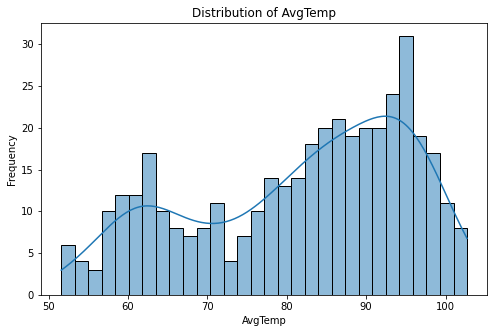

Plotting the distribution of AverageDew.


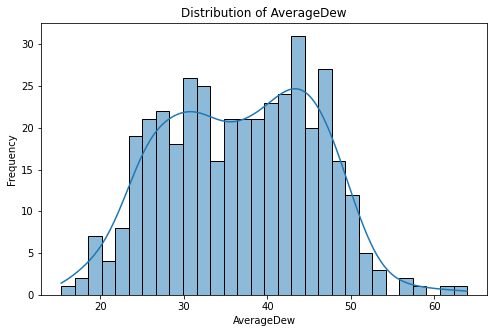

Plotting the distribution of Humidity.


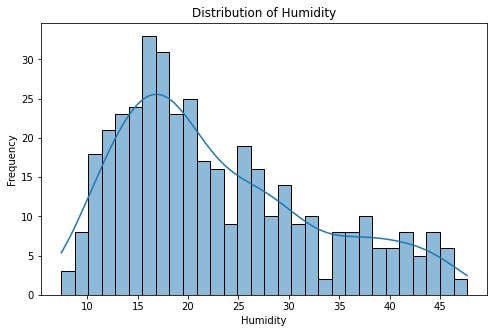

Plotting the distribution of Wind.


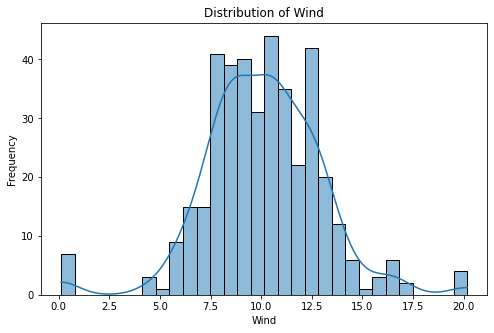

Plotting the distribution of Pressure.


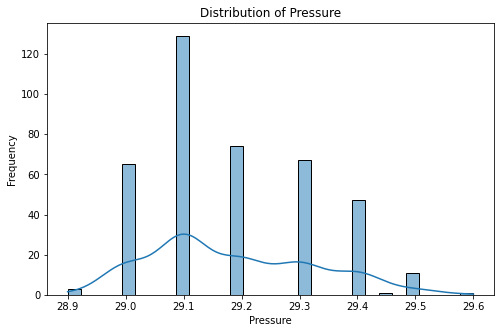

Plotting the distribution of Solar(PV).


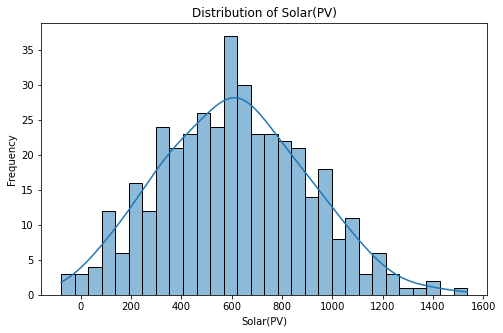

In [ ]:
print("Now lets visualize the data.\n")
print("First, lets Visualize the distribution of numerical variables to understand their range, and variability. I will use a histogram for the continous variables.\n")
print("I will set the kde to True so that a smooth density curve is added to the histogram, providing a clearer visualization of the data's probability distribution and highlighting patterns and peaks.\n")
numerical_columns = ['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure', 'Solar(PV)']
for col in numerical_columns:
    print(f"Plotting the distribution of {col}.")
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Now I will detect and handle the univariate outliers first.

Using box plots to identify outliers in numerical variables.
Creating a box plot for AvgTemp.


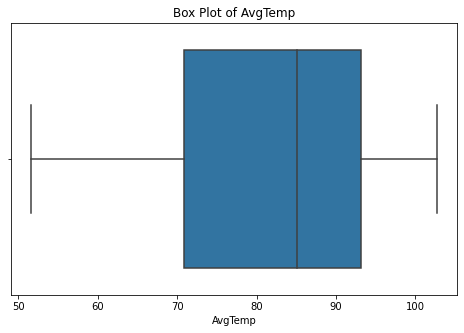

Creating a box plot for AverageDew.


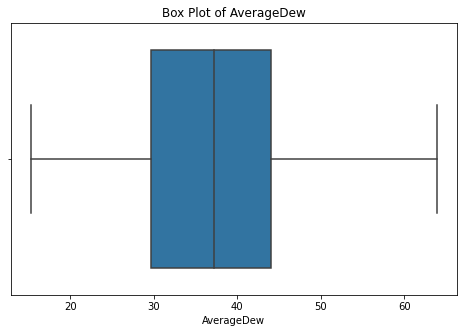

Creating a box plot for Humidity.


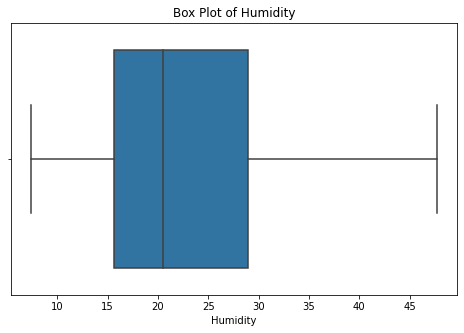

Creating a box plot for Wind.


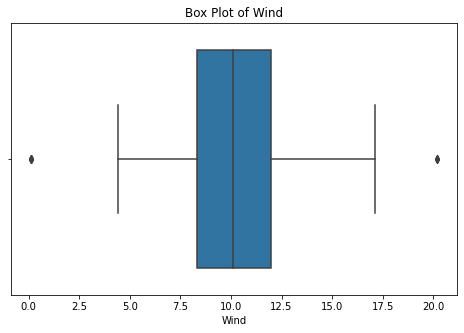

Creating a box plot for Pressure.


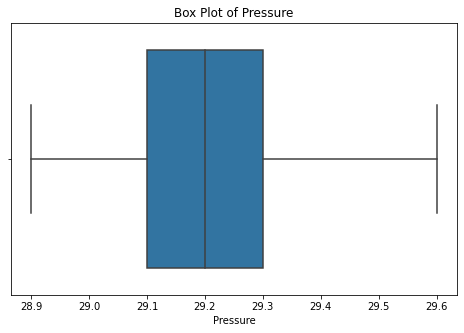

Creating a box plot for Solar(PV).


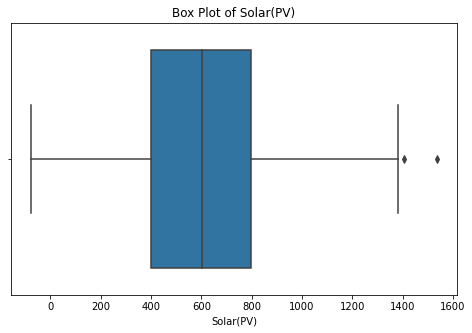

In [ ]:
print("Now I will detect and handle the univariate outliers first.\n")
print("Using box plots to identify outliers in numerical variables.")
for col in numerical_columns:
    print(f"Creating a box plot for {col}.")
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

In [ ]:
print("We can see from the boxplot that we have outliers in only two variables(Solar(PV) and Wind).Now lets handle them.\n")
print("But first lets detect the outliers for all numerical variables using the Tukey's method just to make sure that no other variable has outliers.")

We can see from the boxplot that we have outliers in only two variables(Solar(PV) and Wind).Now lets handle them.

But first lets detect the outliers for all numerical variables using the Tukey's method just to make sure that no other variable has outliers.


In [ ]:
def detect_outliers_iqr(df):
    outlier_info = {}
    for column in numerical_columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outliers': outliers
        
        }

    return outlier_info
outliers_info = detect_outliers_iqr(data)
for column, info in outliers_info.items():
    print(f"Variable: {column}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print(f"Outliers (First 5 Rows):\n{info['outliers'].head()}\n")


Variable: AvgTemp
Lower Bound: 37.32499999999998, Upper Bound: 126.72500000000002
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: AverageDew
Lower Bound: 8.0625, Upper Bound: 65.5625
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: Humidity
Lower Bound: -4.400000000000002, Upper Bound: 49.0
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: Wind
Lower Bound: 2.7500000000000018, Upper Bound: 17.549999999999997
Number of Outliers: 11
Outliers (First 5 Rows):
          Date  AvgTemp  AverageDew  Humidity      Wind  Pressure   Solar(PV)
16  2023-01-17     92.0        26.7      10.4  0.122741      29.0   55.388577
27  2023-01-28     92.1        28.6      10.8  0.122741  

In [ ]:
print("Now we can see for sure that we have outliers in only two variables(Solar(PV) and Wind).Now lets handle them.\n")

Now we can see for sure that we have outliers in only two variables(Solar(PV) and Wind).Now lets handle them.



Now let's handle the negative values in solar as its physically impossible (solar panels can't generate negative power). And then we handle outliers by clipping. Clipping will adjust the outlier values to fall within the acceptable range without removing any rows from the dataset.

Step 1: Handling negative values in 'Solar(PV)'.
Negative values in 'Solar(PV)' have been replaced with the mean (614.6347944556431).

Step 2: Handling outliers in 'Solar(PV)' and 'Wind' using clipping.

Clipping applied to 'Solar(PV)'. Values below -163.07096226515011 are set to -163.07096226515011, and values above 1375.4599957116457 are set to 1375.4599957116457.
Clipping applied to 'Wind'. Values below 2.7500000000000018 are set to 2.7500000000000018, and values above 17.549999999999997 are set to 17.549999999999997.
Summary after handling outliers by clipping:
         Solar(PV)        Wind
count   398.000000  398.000000
mean    614.634794   10.128266
std     283.085334    2.667832
min       4.162581   

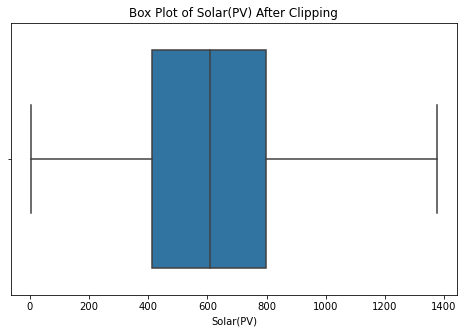

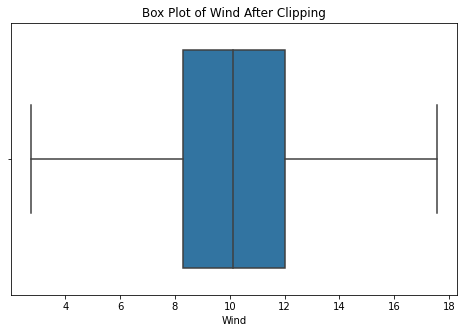

In [ ]:
print("Now let's handle the negative values in solar as its physically impossible (solar panels can't generate negative power). And then we handle outliers by clipping. Clipping will adjust the outlier values to fall within the acceptable range without removing any rows from the dataset.\n")
print("Step 1: Handling negative values in 'Solar(PV)'.")
mean_solar = data['Solar(PV)'][data['Solar(PV)'] >= 0].mean()  
data['Solar(PV)'] = data['Solar(PV)'].apply(lambda x: mean_solar if x < 0 else x)
print(f"Negative values in 'Solar(PV)' have been replaced with the mean ({mean_solar}).\n")
print("Step 2: Handling outliers in 'Solar(PV)' and 'Wind' using clipping.\n")

def handle_outliers_clipping(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    print(f"Clipping applied to '{column}'. Values below {lower_bound} are set to {lower_bound}, and values above {upper_bound} are set to {upper_bound}.")

handle_outliers_clipping(data, 'Solar(PV)')

handle_outliers_clipping(data, 'Wind')

print("Summary after handling outliers by clipping:")
print(data[['Solar(PV)', 'Wind']].describe())




plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Solar(PV)'])
plt.title('Box Plot of Solar(PV) After Clipping')
plt.xlabel('Solar(PV)')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Wind'])
plt.title('Box Plot of Wind After Clipping')
plt.xlabel('Wind')
plt.show()


In [ ]:
print("Now lets check if we handled the outliers.\n")
outliers_info = detect_outliers_iqr(data)
for column, info in outliers_info.items():
    print(f"Variable: {column}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['num_outliers']}")
    print(f"Outliers (First 5 Rows):\n{info['outliers'].head()}\n")

Now lets check if we handled the outliers.

Variable: AvgTemp
Lower Bound: 37.32499999999998, Upper Bound: 126.72500000000002
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: AverageDew
Lower Bound: 8.0625, Upper Bound: 65.5625
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: Humidity
Lower Bound: -4.400000000000002, Upper Bound: 49.0
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: Wind
Lower Bound: 2.7500000000000018, Upper Bound: 17.549999999999997
Number of Outliers: 0
Outliers (First 5 Rows):
Empty DataFrame
Columns: [Date, AvgTemp, AverageDew, Humidity, Wind, Pressure, Solar(PV)]
Index: []

Variable: Pressure
Lower Bound: 28.800000000000004, Upper Bound: 29.6

In [ ]:
print("I will convert the 'Date' column to datetime format and then one-hot encode to easily analyze how solar panel output changes over  seasons, allowing me after to group by season  for better insights, and extract features that correlate with solar panel output to improve model performance.\n")
data['Date'] = pd.to_datetime(data['Date'])
print("Data type of 'Date' column after conversion:", data['Date'].dtype)

I will convert the 'Date' column to datetime format and then one-hot encode to easily analyze how solar panel output changes over  seasons, allowing me after to group by season  for better insights, and extract features that correlate with solar panel output to improve model performance.

Data type of 'Date' column after conversion: datetime64[ns]


In [ ]:
print(" Simplifying the 'Date' column by grouping into seasons.")


data['Date'] = pd.to_datetime(data['Date'])


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


data['Season'] = data['Date'].dt.month.apply(get_season)


data = pd.get_dummies(data, columns=['Season'], prefix='Season')


data.drop(columns=['Date'], inplace=True)


print("Dataset after grouping by season and one-hot encoding:")
print(data.head())

 Simplifying the 'Date' column by grouping into seasons.
Dataset after grouping by season and one-hot encoding:
   AvgTemp  AverageDew  Humidity  Wind  Pressure   Solar(PV)  Season_Fall  \
0     87.9        31.3      13.4   5.7      29.2  325.260557            0   
1     90.2        34.0      14.2   6.6      29.1  319.158927            0   
2     93.2        31.4      11.8   8.8      29.1  351.777739            0   
3     92.5        24.9       9.4   8.0      29.1  324.383284            0   
4     91.2        18.9       7.8   9.4      29.2   71.311129            0   

   Season_Spring  Season_Summer  Season_Winter  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              0              0              1  
4              0              0              1  


In [ ]:
print("Available columns in the dataset:", data.columns)

Available columns in the dataset: Index(['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure', 'Solar(PV)',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


In [ ]:
print("Now I will perform standardization to scale the numerical features, centering them around 0 with a standard deviation of 1. This ensures all features contribute equally and are less affected by outliers.\n")
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['AvgTemp', 'AverageDew', 'Humidity', 'Wind', 'Pressure', 'Solar(PV)']
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
print("Summary of standardized features:")
print(data[columns_to_standardize].describe())
print("Verification of mean and standard deviation after standardization:")
for column in columns_to_standardize:
    print(f"{column}: Mean={data[column].mean():.2f}, Std={data[column].std():.2f}")

Now I will perform standardization to scale the numerical features, centering them around 0 with a standard deviation of 1. This ensures all features contribute equally and are less affected by outliers.

Summary of standardized features:
            AvgTemp    AverageDew      Humidity          Wind      Pressure  \
count  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02  3.980000e+02   
mean   3.552740e-16 -3.743516e-16  5.272165e-17  3.355775e-16  3.295371e-14   
std    1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00  1.001259e+00   
min   -2.230955e+00 -2.411746e+00 -1.597656e+00 -2.769122e+00 -2.020781e+00   
25%   -8.077690e-01 -8.014062e-01 -7.535755e-01 -6.861629e-01 -5.928699e-01   
50%    2.420614e-01  5.575540e-02 -2.532847e-01 -1.060858e-02  1.210854e-01   
75%    8.446048e-01  8.145542e-01  6.164516e-01  7.024765e-01  8.350407e-01   
max    1.546956e+00  3.051606e+00  2.538081e+00  2.785436e+00  2.976907e+00   

          Solar(PV)  
count  3.980000e+02  
mean 

Step 1: Now lets perform pearson correlation analysis to identify highly correlated features.


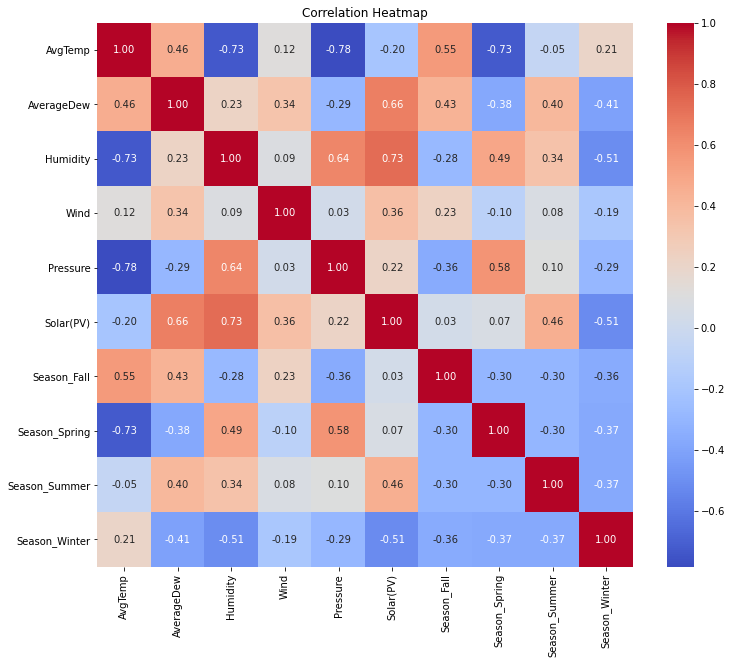


Correlation of features with 'Solar(PV)':
Solar(PV)        1.000000
Humidity         0.733143
AverageDew       0.664464
Season_Summer    0.455802
Wind             0.362093
Pressure         0.215952
Season_Spring    0.073571
Season_Fall      0.032111
AvgTemp         -0.203926
Season_Winter   -0.512128
Name: Solar(PV), dtype: float64

Features highly correlated with 'Solar(PV)' (|correlation| > 0.5):
['Solar(PV)', 'Humidity', 'AverageDew', 'Season_Winter']

Features with low correlation to 'Solar(PV)' (to consider removing): ['AvgTemp', 'Wind', 'Pressure', 'Season_Fall', 'Season_Spring', 'Season_Summer']


In [ ]:
print("Step 1: Now lets perform pearson correlation analysis to identify highly correlated features.")

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

solar_corr = correlation_matrix["Solar(PV)"].sort_values(ascending=False)
print("\nCorrelation of features with 'Solar(PV)':")
print(solar_corr)


threshold = 0.5  # Define correlation threshold
important_features = solar_corr[abs(solar_corr) > threshold].index.tolist()
print(f"\nFeatures highly correlated with 'Solar(PV)' (|correlation| > {threshold}):")
print(important_features)


non_important_features = [col for col in data.columns if col not in important_features and col != "Solar(PV)"]
print(f"\nFeatures with low correlation to 'Solar(PV)' (to consider removing): {non_important_features}")

In [ ]:
print("Step 2: Retaining only the features with significant correlation to 'Solar(PV)'.")

# Define the features to retain
features_to_keep = ['Solar(PV)', 'Humidity', 'AverageDew', 'Season_Winter']

# Retain only these features
data_filtered = data[features_to_keep]

# Verify the updated dataset
print("Dataset after retaining important features:")
print(data_filtered.head())

Step 2: Retaining only the features with significant correlation to 'Solar(PV)'.
Dataset after retaining important features:
   Solar(PV)  Humidity  AverageDew  Season_Winter
0  -1.023502 -0.981913   -0.613112              1
1  -1.045083 -0.899814   -0.309592              1
2  -0.929712 -1.146111   -0.601870              1
3  -1.026605 -1.392408   -1.332565              1
4  -1.921709 -1.556606   -2.007053              1


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X)  

print(f"Reduced dataset shape: {X_reduced.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Reduced dataset shape: (398, 3)
Explained variance ratio: [0.59137226 0.35000407 0.05862367]


In [ ]:
print("Step 3: Splitting the dataset into training and testing sets.")


X = data_filtered.drop(columns=['Solar(PV)'])
y = data_filtered['Solar(PV)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Step 3: Splitting the dataset into training and testing sets.
Training set size: (278, 3)
Testing set size: (120, 3)


In [ ]:
print("Step 4: Training a Linear Regression model.")



model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMean Squared Error (MSE): {mse}\nR² Score: {r2}")

Step 4: Training a Linear Regression model.
Model Performance:
Mean Squared Error (MSE): 0.25120149846708845
R² Score: 0.7577176777398136


Now lets plot the prdict values against the test After applying linear regression


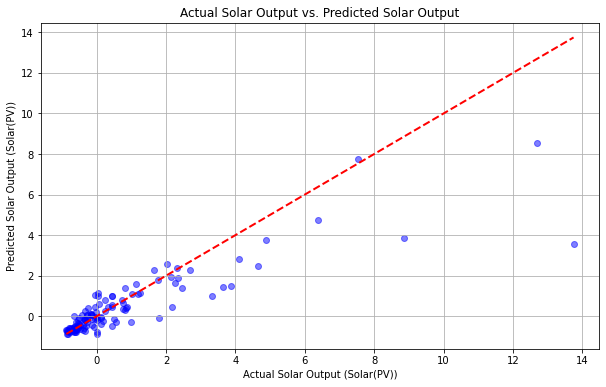

In [ ]:

print("Now lets plot the prdict values against the test After applying linear regression")
actual_solar = np.exp(y_test) - 1  
predicted_solar = np.exp(y_pred) - 1  


plt.figure(figsize=(10, 6))
plt.scatter(actual_solar, predicted_solar, alpha=0.5, color='blue')
plt.title('Actual Solar Output vs. Predicted Solar Output')
plt.xlabel('Actual Solar Output (Solar(PV))')
plt.ylabel('Predicted Solar Output (Solar(PV))')
plt.plot([actual_solar.min(), actual_solar.max()], [actual_solar.min(), actual_solar.max()], 'k--', lw=2, color='red')  
plt.grid()
plt.show()

In [ ]:
print("Step 5: Training a Polynomial Regression model.")



degree = 2  
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])


poly_model.fit(X_train, y_train)


y_pred_poly = poly_model.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) Performance:\nMean Squared Error (MSE): {mse_poly}\nR² Score: {r2_poly}")

Step 5: Training a Polynomial Regression model.
Polynomial Regression (degree=2) Performance:
Mean Squared Error (MSE): 0.22280467037812265
R² Score: 0.7851062462642937


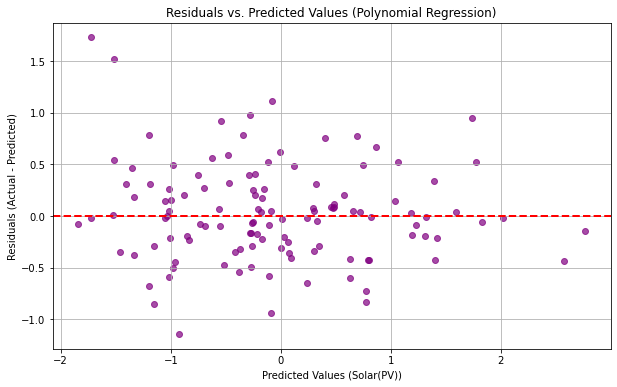

In [ ]:

residuals_poly = y_test - y_pred  


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_poly, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  
plt.title('Residuals vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Predicted Values (Solar(PV))')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()

In [ ]:
print("Residual Analysis:")
print("- The residual plot for Polynomial Regression shows how errors are distributed.")
print("- Residuals should be randomly scattered around the horizontal line (0) with no discernible pattern.")
print("- It shows that there is no pattern exists no (heteroscedasticity)")

Residual Analysis:
- The residual plot for Polynomial Regression shows how errors are distributed.
- Residuals should be randomly scattered around the horizontal line (0) with no discernible pattern.
- If patterns exist, it may suggest areas for further improvement.


In [ ]:
print("Training a Polynomial Regression model with a higher degree.")



degree = 3

poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("linear_regression", LinearRegression())
])


poly_model.fit(X_train, y_train)


y_pred_poly = poly_model.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) Performance:\nMean Squared Error (MSE): {mse_poly}\nR² Score: {r2_poly}")

Training a Polynomial Regression model with a higher degree.
Polynomial Regression (degree=3) Performance:
Mean Squared Error (MSE): 0.2289367916819605
R² Score: 0.7791918524452232


In [ ]:
print("We can see that the error increased so its better to stick with degree:2, and the R squared score increased which may indicate an overfitting happened")

We can see that the error increased so its better to stick with degree:2


In [ ]:
print("Training a Ridge Regression model.")
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression Performance:\nMean Squared Error (MSE): {mse_ridge}\nR² Score: {r2_ridge}")

Training a Ridge Regression model.
Ridge Regression Performance:
Mean Squared Error (MSE): 0.25126725021400026
R² Score: 0.7576542605785639


In [ ]:
print("Step: Training a Lasso Regression model.")

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Performance:\nMean Squared Error (MSE): {mse_lasso}\nR² Score: {r2_lasso}")

Step: Training a Lasso Regression model.
Lasso Regression Performance:
Mean Squared Error (MSE): 0.2499644682983188
R² Score: 0.7589107858375931


In [ ]:
print("Training a Decision Tree Regressor.")

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Performance:\nMean Squared Error (MSE): {mse_dt}\nR² Score: {r2_dt}")

Training a Decision Tree Regressor.
Decision Tree Regressor Performance:
Mean Squared Error (MSE): 0.38775293329532856
R² Score: 0.6260146467466245


In [ ]:
print("Training a Random Forest Regressor.")

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance:\nMean Squared Error (MSE): {mse_rf}\nR² Score: {r2_rf}")

Training a Random Forest Regressor.
Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.25349369412670647
R² Score: 0.7555068689234812


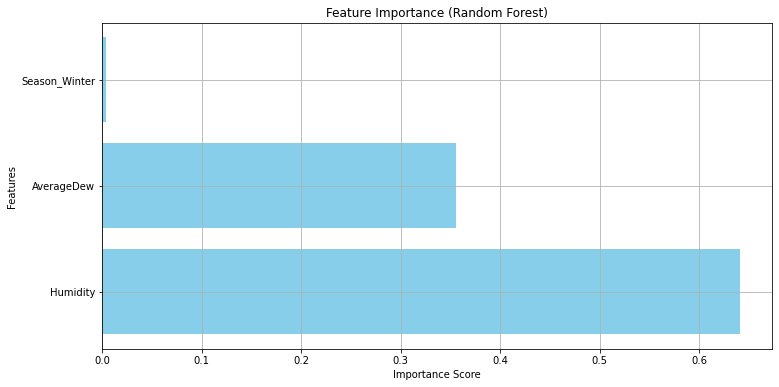

In [ ]:

if hasattr(rf_model, 'feature_importances_'):
    feature_importance = rf_model.feature_importances_
    features = X_train.columns

 
    plt.figure(figsize=(12, 6))
    plt.barh(features, feature_importance, color='skyblue')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.grid()
    plt.show()

In [ ]:
print("Feature Importance (Random Forest):")
print("- The feature importance plot highlights the relative contribution of each feature to the Random Forest model's predictions.")
print("- Features with higher importance scores have a stronger influence on the target variable(AverageDew and Humidity).")

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
  
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
    
   
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
   
    results = {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    return results


model_results = []


model_results.append(evaluate_model(
    'Linear Regression', LinearRegression(), X_train, X_test, y_train, y_test))


poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])
model_results.append(evaluate_model(
    'Polynomial Regression (degree=2)', poly_model, X_train, X_test, y_train, y_test))


model_results.append(evaluate_model(
    'Ridge Regression', Ridge(alpha=1.0), X_train, X_test, y_train, y_test))


model_results.append(evaluate_model(
    'Lasso Regression', Lasso(alpha=0.01), X_train, X_test, y_train, y_test))


model_results.append(evaluate_model(
    'Decision Tree', DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test))


model_results.append(evaluate_model(
    'Random Forest', RandomForestRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test))


results_df = pd.DataFrame(model_results)



In [ ]:
results_df.head(6)

,Model,MAE,MSE,RMSE,R²
0,Linear Regression,0.376606,0.251201,0.501200,0.757718
1,Polynomial Regression (degree=2),0.352167,0.222805,0.472022,0.785106
2,Ridge Regression,0.376767,0.251267,0.501266,0.757654
3,Lasso Regression,0.375736,0.249964,0.499964,0.758911
4,Decision Tree,0.484387,0.387753,0.622698,0.626015
5,Random Forest,0.397583,0.253494,0.503482,0.755507


In [ ]:
print("Now lets analyze  the results and determine the best algorithm):\n")


for index, row in results_df.iterrows():
    print(f"- {row['Model']}:")
    print(f"  MAE: {row['MAE']:.6f}, MSE: {row['MSE']:.6f}, RMSE: {row['RMSE']:.6f}, R²: {row['R²']:.6f}")


best_r2_index = results_df['R²'].idxmax()
best_mae_index = results_df['MAE'].idxmin()
best_mse_index = results_df['MSE'].idxmin()
best_rmse_index = results_df['RMSE'].idxmin()


best_r2_model = results_df.iloc[best_r2_index]
best_mae_model = results_df.iloc[best_mae_index]
best_mse_model = results_df.iloc[best_mse_index]
best_rmse_model = results_df.iloc[best_rmse_index]

print("\nSummary:")
print(f"- Best \( R^2 \): {best_r2_model['Model']} (R² = {best_r2_model['R²']:.6f})")
print(f"- Lowest MAE: {best_mae_model['Model']} (MAE = {best_mae_model['MAE']:.6f})")
print(f"- Lowest MSE: {best_mse_model['Model']} (MSE = {best_mse_model['MSE']:.6f})")
print(f"- Lowest RMSE: {best_rmse_model['Model']} (RMSE = {best_rmse_model['RMSE']:.6f})")

print("\nOverall:")
print(f"The best-performing model overall based on R² and other metrics is  '{best_r2_model['Model']}'.")

Now lets analyze  the results and determine the best algorithm):

- Linear Regression:
  MAE: 0.376606, MSE: 0.251201, RMSE: 0.501200, R²: 0.757718
- Polynomial Regression (degree=2):
  MAE: 0.352167, MSE: 0.222805, RMSE: 0.472022, R²: 0.785106
- Ridge Regression:
  MAE: 0.376767, MSE: 0.251267, RMSE: 0.501266, R²: 0.757654
- Lasso Regression:
  MAE: 0.375736, MSE: 0.249964, RMSE: 0.499964, R²: 0.758911
- Decision Tree:
  MAE: 0.484387, MSE: 0.387753, RMSE: 0.622698, R²: 0.626015
- Random Forest:
  MAE: 0.397583, MSE: 0.253494, RMSE: 0.503482, R²: 0.755507

Summary:
- Best \( R^2 \): Polynomial Regression (degree=2) (R² = 0.785106)
- Lowest MAE: Polynomial Regression (degree=2) (MAE = 0.352167)
- Lowest MSE: Polynomial Regression (degree=2) (MSE = 0.222805)
- Lowest RMSE: Polynomial Regression (degree=2) (RMSE = 0.472022)

Overall:
The best-performing model overall based on R² and other metrics is likely 'Polynomial Regression (degree=2)'.


Now lets visualize the best model: polynomial regression degree=2


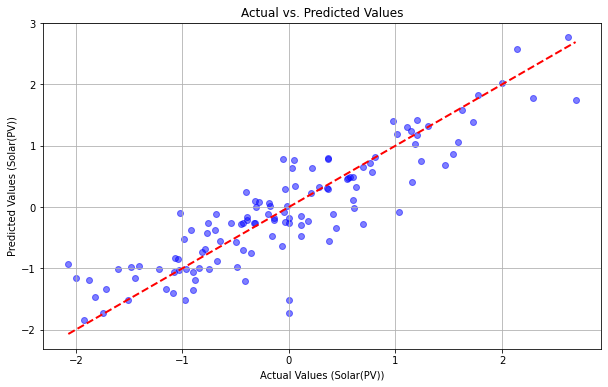

In [ ]:

print("Now lets visualize the best model: polynomial regression degree=2")
best_model = poly_model
best_model.fit(X_train, y_train)  
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # Ideal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (Solar(PV))')
plt.ylabel('Predicted Values (Solar(PV))')
plt.grid()
plt.show()

In [ ]:
print("Polynomial Regression (degree=2) was the best-performing model based on the evaluation metrics.")
print("- This model achieved the highest R² score and the lowest MAE, MSE, and RMSE.")
print("- The inclusion of non-linear features in Polynomial Regression allowed it to capture the non-linear relationships between the features and the target variable (Solar(PV)) more effectively.")

In [ ]:
print("Project Summary:")
print("1. Data Preprocessing:")
print("- Handled null values using forward filling and addressed outliers using Tukey's method.")
print("- Converted the 'Date' column into seasonal features and standardized numerical variables.")
print("- Applied feature selection using Pearson correlation to retain the most relevant features for predicting 'Solar(PV)'.")
print("\n2. Modeling:")
print("- Evaluated multiple models, including Linear Regression, Polynomial Regression, Ridge, Lasso, Decision Tree, and Random Forest.")
print("- Polynomial Regression (degree=2) was identified as the best model with the highest R² (0.785106) and the lowest MSE (0.222805).")
print("\n3. Analysis:")
print("- Performed residual analysis to verify the best model's predictions.")
print("- Used feature importance to interpret the Random Forest model.")
print("\n4. Enhancements:")
print("- Hyperparameter tuning was applied to Random Forest for optimal performance.")
print("- PCA was used to ensure dimensionality reduction retained 95% variance.")
print("\n5. Conclusion:")
print("- Polynomial Regression effectively captured non-linear relationships in the data, making it the most suitable model for predicting Solar(PV).")


Project Summary:
1. Data Preprocessing:
- Handled null values using forward filling and addressed outliers using Tukey's method.
- Converted the 'Date' column into seasonal features and standardized numerical variables.
- Applied feature selection using Pearson correlation to retain the most relevant features for predicting 'Solar(PV)'.

2. Modeling:
- Evaluated multiple models, including Linear Regression, Polynomial Regression, Ridge, Lasso, Decision Tree, and Random Forest.
- Polynomial Regression (degree=2) was identified as the best model with the highest R² (0.785106) and the lowest MSE (0.222805).

3. Analysis:
- Performed residual analysis to verify the best model's predictions.
- Used feature importance to interpret the Random Forest model.

4. Enhancements:
- Hyperparameter tuning was applied to Random Forest for optimal performance.
- PCA was used to ensure dimensionality reduction retained 95% variance.

5. Conclusion:
- Polynomial Regression effectively captured non-linear